In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')

In [2]:
df = pd.read_excel('dataset.xlsx')

In [3]:
df.head()

,공고번호,종목,공사명,발주처,지역제한,기초금액,투찰률(%),예정가격,예가범위,추정가격,낙찰금액,업체명,참여업체수,개찰일시
0,20161226783-00,건축/토건,도림고 진로진학실 증축 및 천장교체공사 전자입찰 공고(긴급) (긴급공고),인천광역시교육청 인천광역시동부교육지원청,인천,827694000,87.745,823723175,103% ~ 97%,760050000,7.227780e+08,주식회사 동아토건,182.0,2016/12/27 12:00:00
1,20161224360-00,건축/토건,구 용현치안센터 엘리베이터 등 리모델링,인천광역시 미추홀구,인천,80135000,87.745,79505800,103% ~ 97%,72850000,6.976240e+07,아이앤지종합개발주식..,48.0,2016/12/22 16:00:00
2,2016-19376,건축/토목/토건,16-인-00도 기계실 개수공사,제2002부대,인천,311740000,87.745,308503120,100% ~ 97%,0,2.708000e+08,건원종합건설 주식회사,39.0,2016/12/21 10:30:00
3,20161115295-00,건축/토건,(가칭)남희학교 신축공사,인천지방조달청/인천광역시교육청,전국/인천,13211027000,81.395,13104975550,103% ~ 97%,12371330000,1.066962e+10,예서건설 주식회사,167.0,2016/12/20 11:00:00
4,20161211852-00,건축/토건,중앙시장 B동 3층 관광플랫폼 조성을 위한 개보수공사(건축+기계설비),인천광역시 강화군,인천,292600000,87.745,289644775,103% ~ 97%,266000000,2.541590e+08,에이엔씨종합건설(주),153.0,2016/12/15 16:00:00


In [4]:
df.shape

(1633, 14)

In [6]:
pd.options.display.float_format = '{:.4f}'.format

In [7]:
df.head(1)

,공고번호,종목,공사명,발주처,지역제한,기초금액,투찰률(%),예정가격,예가범위,추정가격,낙찰금액,업체명,참여업체수,개찰일시
0,20161226783-00,건축/토건,도림고 진로진학실 증축 및 천장교체공사 전자입찰 공고(긴급) (긴급공고),인천광역시교육청 인천광역시동부교육지원청,인천,827694000,87.7450,823723175,103% ~ 97%,760050000,722778000.0000,주식회사 동아토건,182.0000,2016/12/27 12:00:00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   공고번호    1633 non-null   object 
 1   종목      1633 non-null   object 
 2   공사명     1633 non-null   object 
 3   발주처     1633 non-null   object 
 4   지역제한    1633 non-null   object 
 5   기초금액    1633 non-null   int64  
 6   투찰률(%)  1633 non-null   float64
 7   예정가격    1633 non-null   int64  
 8   예가범위    1585 non-null   object 
 9   추정가격    1633 non-null   int64  
 10  낙찰금액    1607 non-null   float64
 11  업체명     1632 non-null   object 
 12  참여업체수   1607 non-null   float64
 13  개찰일시    1633 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 178.7+ KB


In [9]:
df.isnull().sum()

공고번호       0
종목         0
공사명        0
발주처        0
지역제한       0
기초금액       0
투찰률(%)     0
예정가격       0
예가범위      48
추정가격       0
낙찰금액      26
업체명        1
참여업체수     26
개찰일시       0
dtype: int64

In [10]:
df.dropna(inplace=True)
df.isnull().sum()

공고번호      0
종목        0
공사명       0
발주처       0
지역제한      0
기초금액      0
투찰률(%)    0
예정가격      0
예가범위      0
추정가격      0
낙찰금액      0
업체명       0
참여업체수     0
개찰일시      0
dtype: int64

In [11]:
df = df.astype({'기초금액':'int64', '추정가격':'int64', '예정가격':'int64', '낙찰금액':'int64', '참여업체수':'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1572 entries, 0 to 1632
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   공고번호    1572 non-null   object 
 1   종목      1572 non-null   object 
 2   공사명     1572 non-null   object 
 3   발주처     1572 non-null   object 
 4   지역제한    1572 non-null   object 
 5   기초금액    1572 non-null   int64  
 6   투찰률(%)  1572 non-null   float64
 7   예정가격    1572 non-null   int64  
 8   예가범위    1572 non-null   object 
 9   추정가격    1572 non-null   int64  
 10  낙찰금액    1572 non-null   int64  
 11  업체명     1572 non-null   object 
 12  참여업체수   1572 non-null   int64  
 13  개찰일시    1572 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 184.2+ KB


In [13]:
df['개찰일시'] = pd.to_datetime(df['개찰일시'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1572 entries, 0 to 1632
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   공고번호    1572 non-null   object        
 1   종목      1572 non-null   object        
 2   공사명     1572 non-null   object        
 3   발주처     1572 non-null   object        
 4   지역제한    1572 non-null   object        
 5   기초금액    1572 non-null   int64         
 6   투찰률(%)  1572 non-null   float64       
 7   예정가격    1572 non-null   int64         
 8   예가범위    1572 non-null   object        
 9   추정가격    1572 non-null   int64         
 10  낙찰금액    1572 non-null   int64         
 11  업체명     1572 non-null   object        
 12  참여업체수   1572 non-null   int64         
 13  개찰일시    1572 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(7)
memory usage: 184.2+ KB


In [16]:
df['연도'] = df['개찰일시'].dt.year
df['월'] = df['개찰일시'].dt.month
df['일'] = df['개찰일시'].dt.day
df

,공고번호,종목,공사명,발주처,지역제한,기초금액,투찰률(%),예정가격,예가범위,추정가격,낙찰금액,업체명,참여업체수,개찰일시,연도,월,일
0,20161226783-00,건축/토건,도림고 진로진학실 증축 및 천장교체공사 전자입찰 공고(긴급) (긴급공고),인천광역시교육청 인천광역시동부교육지원청,인천,827694000,87.7450,823723175,103% ~ 97%,760050000,722778000,주식회사 동아토건,182,2016-12-27 12:00:00,2016,12,27
1,20161224360-00,건축/토건,구 용현치안센터 엘리베이터 등 리모델링,인천광역시 미추홀구,인천,80135000,87.7450,79505800,103% ~ 97%,72850000,69762400,아이앤지종합개발주식..,48,2016-12-22 16:00:00,2016,12,22
2,2016-19376,건축/토목/토건,16-인-00도 기계실 개수공사,제2002부대,인천,311740000,87.7450,308503120,100% ~ 97%,0,270800000,건원종합건설 주식회사,39,2016-12-21 10:30:00,2016,12,21
3,20161115295-00,건축/토건,(가칭)남희학교 신축공사,인천지방조달청/인천광역시교육청,전국/인천,13211027000,81.3950,13104975550,103% ~ 97%,12371330000,10669617000,예서건설 주식회사,167,2016-12-20 11:00:00,2016,12,20
4,20161211852-00,건축/토건,중앙시장 B동 3층 관광플랫폼 조성을 위한 개보수공사(건축+기계설비),인천광역시 강화군,인천,292600000,87.7450,289644775,103% ~ 97%,266000000,254159000,에이엔씨종합건설(주),153,2016-12-15 16:00:00,2016,12,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,20210102583-00,건축/토건/철콘/습식.방수,[상호진출] 문갑도 행정지원센터 신축공사 (긴급공고),인천광역시 옹진군,인천,555027000,87.7450,549304750,103% ~ 97%,504570000,486275000,주식회사 무진건설,124,2021-01-12 15:00:00,2021,1,12
1628,20210102540-00,건축/토건/철콘/습식.방수,승봉도 행정지원센터 신축공사 (긴급공고),인천광역시 옹진군,인천,634271000,87.7450,634516850,103% ~ 97%,576610000,560889000,송림종합건설 주식회사,126,2021-01-12 15:00:00,2021,1,12
1629,20201241230-00,건축/토건/기계설비,"부평남부권역 노인문화센터 건립 건축공사(건축,토목,조경,기계) (긴급공고) [주계약...",인천광역시 부평구,인천,5442853000,86.7450,5411012350,103% ~ 97%,4948048269,4735843000,현영건설(주),141,2021-01-08 11:00:00,2021,1,8
1630,20201216971-00,건축/토건,가칭)검단5초등학교 신축공사(계속비공사) (긴급공고),인천지방조달청/인천광역시교육청,전국/인천,21640024000,81.3950,21617518400,103% ~ 97%,20541950000,17815492000,(주) 에스디건설,210,2021-01-08 11:00:00,2021,1,8


In [17]:
df.reset_index(drop=True, inplace=True)
df

,공고번호,종목,공사명,발주처,지역제한,기초금액,투찰률(%),예정가격,예가범위,추정가격,낙찰금액,업체명,참여업체수,개찰일시,연도,월,일
0,20161226783-00,건축/토건,도림고 진로진학실 증축 및 천장교체공사 전자입찰 공고(긴급) (긴급공고),인천광역시교육청 인천광역시동부교육지원청,인천,827694000,87.7450,823723175,103% ~ 97%,760050000,722778000,주식회사 동아토건,182,2016-12-27 12:00:00,2016,12,27
1,20161224360-00,건축/토건,구 용현치안센터 엘리베이터 등 리모델링,인천광역시 미추홀구,인천,80135000,87.7450,79505800,103% ~ 97%,72850000,69762400,아이앤지종합개발주식..,48,2016-12-22 16:00:00,2016,12,22
2,2016-19376,건축/토목/토건,16-인-00도 기계실 개수공사,제2002부대,인천,311740000,87.7450,308503120,100% ~ 97%,0,270800000,건원종합건설 주식회사,39,2016-12-21 10:30:00,2016,12,21
3,20161115295-00,건축/토건,(가칭)남희학교 신축공사,인천지방조달청/인천광역시교육청,전국/인천,13211027000,81.3950,13104975550,103% ~ 97%,12371330000,10669617000,예서건설 주식회사,167,2016-12-20 11:00:00,2016,12,20
4,20161211852-00,건축/토건,중앙시장 B동 3층 관광플랫폼 조성을 위한 개보수공사(건축+기계설비),인천광역시 강화군,인천,292600000,87.7450,289644775,103% ~ 97%,266000000,254159000,에이엔씨종합건설(주),153,2016-12-15 16:00:00,2016,12,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,20210102583-00,건축/토건/철콘/습식.방수,[상호진출] 문갑도 행정지원센터 신축공사 (긴급공고),인천광역시 옹진군,인천,555027000,87.7450,549304750,103% ~ 97%,504570000,486275000,주식회사 무진건설,124,2021-01-12 15:00:00,2021,1,12
1568,20210102540-00,건축/토건/철콘/습식.방수,승봉도 행정지원센터 신축공사 (긴급공고),인천광역시 옹진군,인천,634271000,87.7450,634516850,103% ~ 97%,576610000,560889000,송림종합건설 주식회사,126,2021-01-12 15:00:00,2021,1,12
1569,20201241230-00,건축/토건/기계설비,"부평남부권역 노인문화센터 건립 건축공사(건축,토목,조경,기계) (긴급공고) [주계약...",인천광역시 부평구,인천,5442853000,86.7450,5411012350,103% ~ 97%,4948048269,4735843000,현영건설(주),141,2021-01-08 11:00:00,2021,1,8
1570,20201216971-00,건축/토건,가칭)검단5초등학교 신축공사(계속비공사) (긴급공고),인천지방조달청/인천광역시교육청,전국/인천,21640024000,81.3950,21617518400,103% ~ 97%,20541950000,17815492000,(주) 에스디건설,210,2021-01-08 11:00:00,2021,1,8


In [18]:
df['낙찰금액'].describe()

count          1572.0000
mean     1694825493.7564
std      5097158173.8540
min         9628277.0000
25%       172143795.0000
50%       468887400.0000
75%      1630243914.0000
max     94487384424.0000
Name: 낙찰금액, dtype: float64

In [19]:
df['예가범위'].unique()

array(['103% ~ 97%', '100% ~ 97%', '102% ~ 98%', '100.1% ~ 97%',
       '100.6% ~ 97%', '101.3% ~ 97%', '102.5% ~ 97.5%', '100.7% ~ 97%',
       '100.3% ~ 97%', '100% ~ 92%', '101.4% ~ 97%', '100.9% ~ 97%',
       '100.2% ~ 97%', '101% ~ 97%', '100.4% ~ 97%', '102.1% ~ 97%',
       '100.8% ~ 97%', '100% ~ 96%', '101.6% ~ 97%', '100% ~ 98%',
       '100.3% ~ 98%', '101.9% ~ 98%', '100.6% ~ 98%', '100.1% ~ 98%',
       '101.4% ~ 98%', '100.4% ~ 98%'], dtype=object)

In [21]:
df.groupby(['예가범위'])['낙찰금액'].mean()

예가범위
100% ~ 92%       2132679237.8947
100% ~ 96%        185636780.0000
100% ~ 97%        750358887.5644
100% ~ 98%        785335090.8889
100.1% ~ 97%     1905324430.0000
100.1% ~ 98%     2303133751.0000
100.2% ~ 97%     4539607140.0000
100.3% ~ 97%     3656514652.5000
100.3% ~ 98%     2146804225.0000
100.4% ~ 97%     1310700000.0000
100.4% ~ 98%     2021293500.0000
100.6% ~ 97%     3315355700.0000
100.6% ~ 98%     2130385000.0000
100.7% ~ 97%       42874320.0000
100.8% ~ 97%      510741900.0000
100.9% ~ 97%     2826282840.0000
101% ~ 97%        183117000.0000
101.3% ~ 97%      391899212.5000
101.4% ~ 97%     2049075686.6667
101.4% ~ 98%     1213303858.0000
101.6% ~ 97%       36334430.0000
101.9% ~ 98%      870853000.0000
102% ~ 98%       1894772988.8051
102.1% ~ 97%      115614880.0000
102.5% ~ 97.5%   2080421762.3636
103% ~ 97%       1755094032.1574
Name: 낙찰금액, dtype: float64

Text(0.5, 1.0, '예가범위에 따른 평균 낙찰 금액')

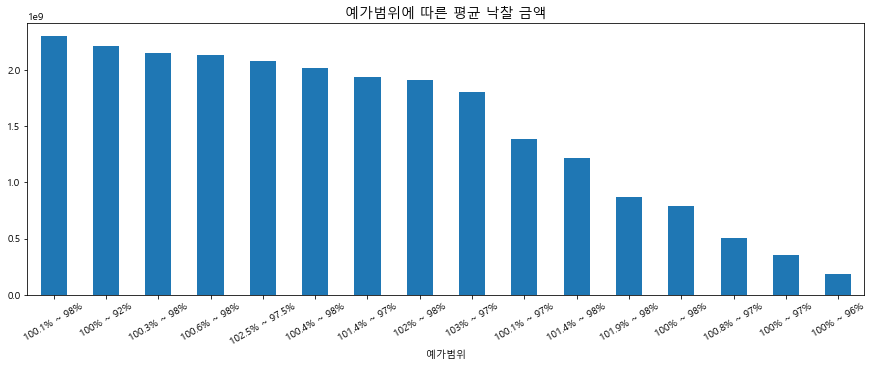

In [116]:
g = df.groupby(['예가범위'])['낙찰금액'].mean().sort_values(ascending=False)
g.plot.bar(rot=30, figsize=(15, 5))
plt.title('예가범위에 따른 평균 낙찰 금액', fontsize=14)

<AxesSubplot:xlabel='연도'>

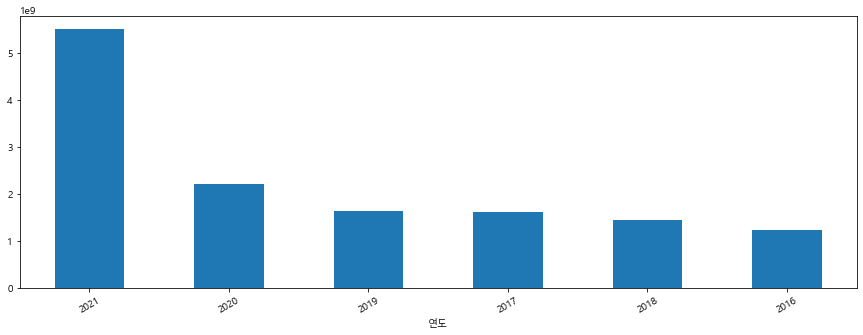

In [23]:
g = df.groupby(['연도'])['낙찰금액'].mean().sort_values(ascending=False)
g.plot.bar(rot=30, figsize=(15, 5))

<AxesSubplot:xlabel='연도'>

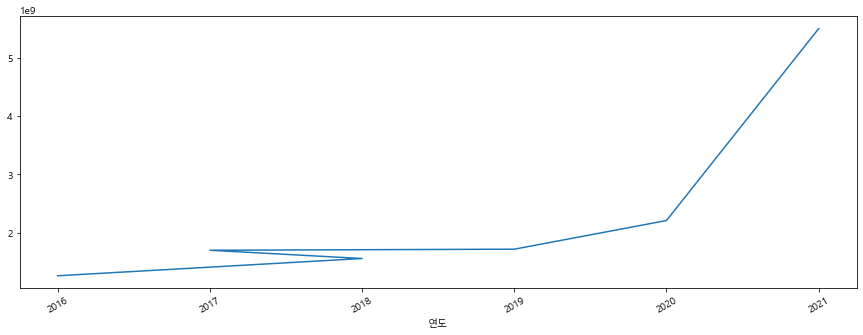

In [31]:
g = df.groupby(['연도'])['낙찰금액'].mean().sort_values(ascending=False)
g.plot(rot=30, figsize=(15, 5))

In [26]:
df.describe()

,기초금액,투찰률(%),예정가격,추정가격,낙찰금액,참여업체수,연도,월,일
count,1572.0000,1572.0000,1572.0000,1572.0000,1572.0000,1572.0000,1572.0000,1572.0000,1572.0000
mean,2006143928.9453,86.7412,2001684112.2494,1774603272.2106,1694825493.7564,131.0083,2018.2163,7.4885,16.1845
std,6358197136.3379,6.3176,6374081627.0917,6315364166.1051,5097158173.8540,110.3896,1.3935,3.0997,8.4390
min,11076900.0000,0.0000,0.0000,0.0000,9628277.0000,2.0000,2016.0000,1.0000,1.0000
25%,195622845.0000,86.7450,194970258.2500,130843924.7500,172143795.0000,70.0000,2017.0000,5.0000,9.0000
50%,536464060.0000,87.7450,530533450.0000,416455789.5000,468887400.0000,131.0000,2018.0000,7.0000,16.0000
75%,1891774500.0000,87.7450,1879015427.5000,1579122500.0000,1630243914.0000,175.0000,2019.0000,10.0000,23.0000
max,123215386000.0000,87.7450,124477727650.0000,126914430000.0000,94487384424.0000,1425.0000,2021.0000,12.0000,31.0000


In [27]:
idx = df[(df['추정가격'] == 0) | (df['예정가격'] == 0)].index

In [28]:
df = df.drop(idx, axis=0)

In [29]:
df.reset_index(drop=True, inplace=True)

In [30]:
df.describe()

,기초금액,투찰률(%),예정가격,추정가격,낙찰금액,참여업체수,연도,월,일
count,1414.0000,1414.0000,1414.0000,1414.0000,1414.0000,1414.0000,1414.0000,1414.0000,1414.0000
mean,2107419605.8982,86.7242,2104508234.7666,1972454541.1506,1779034351.6132,134.5530,2018.3105,7.4208,16.0806
std,6672740520.3107,6.2420,6689920692.1597,6629751380.4079,5346447299.6226,110.0188,1.3917,3.1437,8.5267
min,26510000.0000,0.0000,26466250.0000,19981819.0000,23229700.0000,2.0000,2016.0000,1.0000,1.0000
25%,208276750.0000,86.7450,207390093.7500,189615000.0000,182636527.5000,77.0000,2017.0000,5.0000,9.0000
50%,554190500.0000,87.7450,549725500.0000,503809545.5000,484371610.0000,140.0000,2018.0000,7.0000,16.0000
75%,1928778810.0000,87.7450,1927084962.5000,1767907930.0000,1678781725.0000,177.0000,2020.0000,10.0000,23.0000
max,123215386000.0000,87.7450,124477727650.0000,126914430000.0000,94487384424.0000,1425.0000,2021.0000,12.0000,31.0000


In [32]:
df['낙찰금액'].skew()

11.634907540656943

<AxesSubplot:>

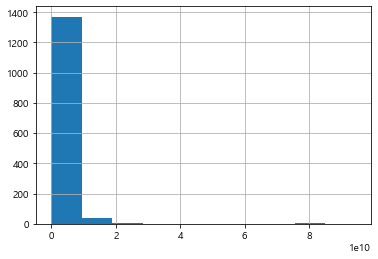

In [33]:
df['낙찰금액'].hist()

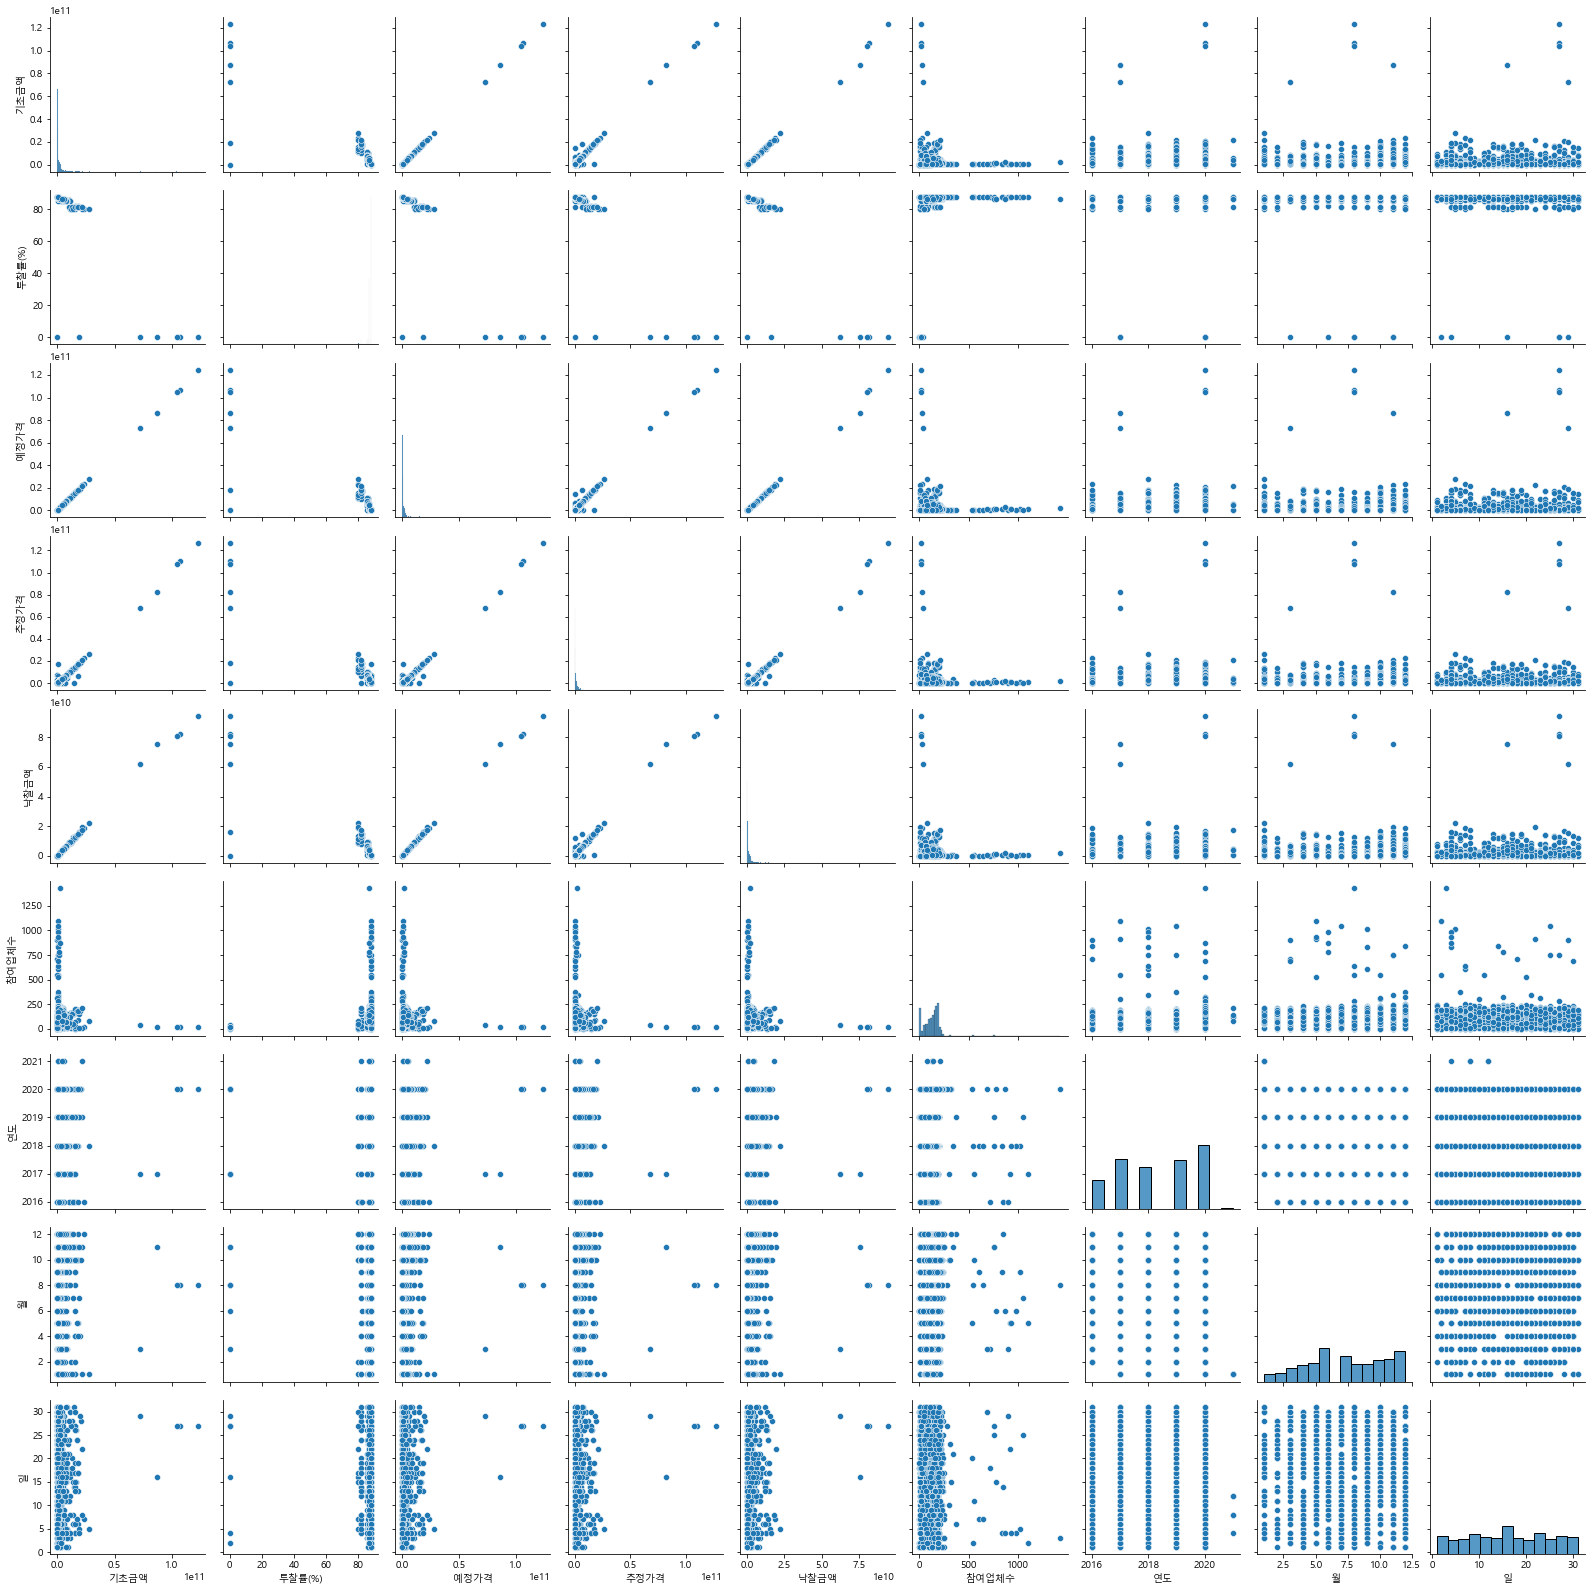

In [34]:
sns.pairplot(df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '103% ~ 97%'),
  Text(1, 0, '102% ~ 98%'),
  Text(2, 0, '102.5% ~ 97.5%'),
  Text(3, 0, '100% ~ 92%'),
  Text(4, 0, '100.1% ~ 97%'),
  Text(5, 0, '100% ~ 97%'),
  Text(6, 0, '101.4% ~ 97%'),
  Text(7, 0, '100.8% ~ 97%'),
  Text(8, 0, '100% ~ 96%'),
  Text(9, 0, '100% ~ 98%'),
  Text(10, 0, '100.3% ~ 98%'),
  Text(11, 0, '101.9% ~ 98%'),
  Text(12, 0, '100.6% ~ 98%'),
  Text(13, 0, '100.1% ~ 98%'),
  Text(14, 0, '101.4% ~ 98%'),
  Text(15, 0, '100.4% ~ 98%')])

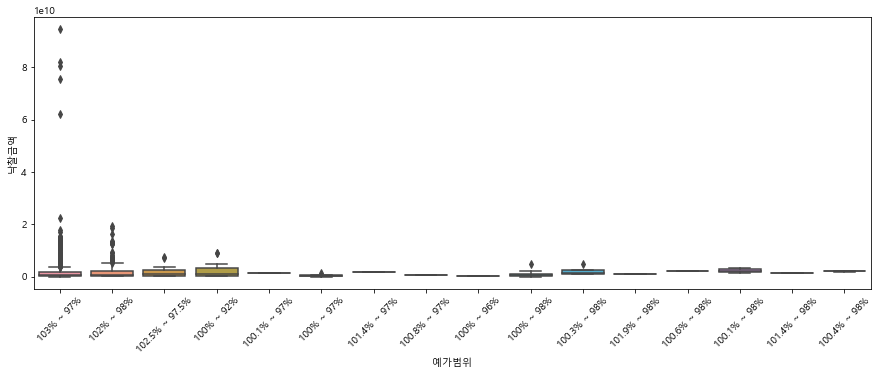

In [35]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='예가범위', y='낙찰금액')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '103% ~ 97%'),
  Text(1, 0, '102% ~ 98%'),
  Text(2, 0, '102.5% ~ 97.5%'),
  Text(3, 0, '100% ~ 92%'),
  Text(4, 0, '100.1% ~ 97%'),
  Text(5, 0, '100% ~ 97%'),
  Text(6, 0, '101.4% ~ 97%'),
  Text(7, 0, '100.8% ~ 97%'),
  Text(8, 0, '100% ~ 96%'),
  Text(9, 0, '100% ~ 98%'),
  Text(10, 0, '100.3% ~ 98%'),
  Text(11, 0, '101.9% ~ 98%'),
  Text(12, 0, '100.6% ~ 98%'),
  Text(13, 0, '100.1% ~ 98%'),
  Text(14, 0, '101.4% ~ 98%'),
  Text(15, 0, '100.4% ~ 98%')])

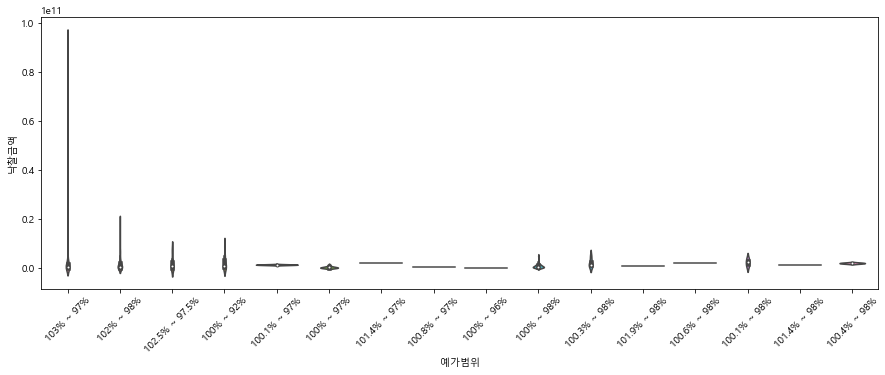

In [36]:
plt.figure(figsize=(15, 5))
sns.violinplot(data=df, x='예가범위', y='낙찰금액')
plt.xticks(rotation=45)

C:\Users\hyuk\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='낙찰금액', ylabel='Density'>

C:\Users\hyuk\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hyuk\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


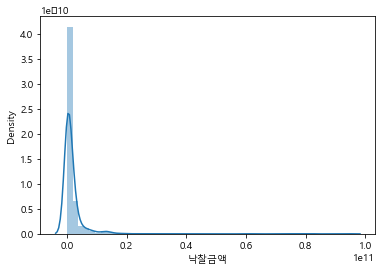

In [37]:
sns.distplot(df['낙찰금액'])

In [38]:
df_price = df[['기초금액', '추정가격', '예정가격', '낙찰금액']]
df_price

,기초금액,추정가격,예정가격,낙찰금액
0,827694000,760050000,823723175,722778000
1,80135000,72850000,79505800,69762400
2,13211027000,12371330000,13104975550,10669617000
3,292600000,266000000,289644775,254159000
4,847219340,794020000,848202150,744294000
...,...,...,...,...
1409,555027000,504570000,549304750,486275000
1410,634271000,576610000,634516850,560889000
1411,5442853000,4948048269,5411012350,4735843000
1412,21640024000,20541950000,21617518400,17815492000


In [39]:
df_price_log = np.log(df_price)
df_price_log

,기초금액,추정가격,예정가격,낙찰금액
0,20.5342,20.4489,20.5293,20.3986
1,18.1992,18.1039,18.1913,18.0606
2,23.3043,23.2386,23.2963,23.0907
3,19.4943,19.3990,19.4842,19.3535
4,20.5575,20.4926,20.5586,20.4279
...,...,...,...,...
1409,20.1345,20.0392,20.1242,20.0023
1410,20.2680,20.1727,20.2684,20.1450
1411,22.4176,22.3223,22.4117,22.2784
1412,23.7978,23.7457,23.7968,23.6033


In [40]:
df_price_log.columns = ['기초금액log', '추정가격log', '예정가격log', '낙찰금액log']
df_price_log

,기초금액log,추정가격log,예정가격log,낙찰금액log
0,20.5342,20.4489,20.5293,20.3986
1,18.1992,18.1039,18.1913,18.0606
2,23.3043,23.2386,23.2963,23.0907
3,19.4943,19.3990,19.4842,19.3535
4,20.5575,20.4926,20.5586,20.4279
...,...,...,...,...
1409,20.1345,20.0392,20.1242,20.0023
1410,20.2680,20.1727,20.2684,20.1450
1411,22.4176,22.3223,22.4117,22.2784
1412,23.7978,23.7457,23.7968,23.6033


In [41]:
df['예가범위']

0       103% ~ 97%
1       103% ~ 97%
2       103% ~ 97%
3       103% ~ 97%
4       102% ~ 98%
           ...    
1409    103% ~ 97%
1410    103% ~ 97%
1411    103% ~ 97%
1412    103% ~ 97%
1413    103% ~ 97%
Name: 예가범위, Length: 1414, dtype: object

In [42]:
data = pd.concat([df[['연도', '월', '일']], df_price_log, df['예가범위']], axis=1)
data

,연도,월,일,기초금액log,추정가격log,예정가격log,낙찰금액log,예가범위
0,2016,12,27,20.5342,20.4489,20.5293,20.3986,103% ~ 97%
1,2016,12,22,18.1992,18.1039,18.1913,18.0606,103% ~ 97%
2,2016,12,20,23.3043,23.2386,23.2963,23.0907,103% ~ 97%
3,2016,12,15,19.4943,19.3990,19.4842,19.3535,103% ~ 97%
4,2016,12,15,20.5575,20.4926,20.5586,20.4279,102% ~ 98%
...,...,...,...,...,...,...,...,...
1409,2021,1,12,20.1345,20.0392,20.1242,20.0023,103% ~ 97%
1410,2021,1,12,20.2680,20.1727,20.2684,20.1450,103% ~ 97%
1411,2021,1,8,22.4176,22.3223,22.4117,22.2784,103% ~ 97%
1412,2021,1,8,23.7978,23.7457,23.7968,23.6033,103% ~ 97%


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   연도       1414 non-null   int64  
 1   월        1414 non-null   int64  
 2   일        1414 non-null   int64  
 3   기초금액log  1414 non-null   float64
 4   추정가격log  1414 non-null   float64
 5   예정가격log  1414 non-null   float64
 6   낙찰금액log  1414 non-null   float64
 7   예가범위     1414 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 88.5+ KB


C:\Users\hyuk\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='낙찰금액log', ylabel='Density'>

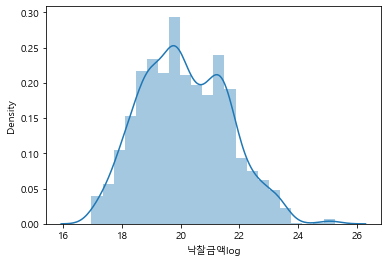

In [44]:
sns.distplot(data['낙찰금액log'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '103% ~ 97%'),
  Text(1, 0, '102% ~ 98%'),
  Text(2, 0, '102.5% ~ 97.5%'),
  Text(3, 0, '100% ~ 92%'),
  Text(4, 0, '100.1% ~ 97%'),
  Text(5, 0, '100% ~ 97%'),
  Text(6, 0, '101.4% ~ 97%'),
  Text(7, 0, '100.8% ~ 97%'),
  Text(8, 0, '100% ~ 96%'),
  Text(9, 0, '100% ~ 98%'),
  Text(10, 0, '100.3% ~ 98%'),
  Text(11, 0, '101.9% ~ 98%'),
  Text(12, 0, '100.6% ~ 98%'),
  Text(13, 0, '100.1% ~ 98%'),
  Text(14, 0, '101.4% ~ 98%'),
  Text(15, 0, '100.4% ~ 98%')])

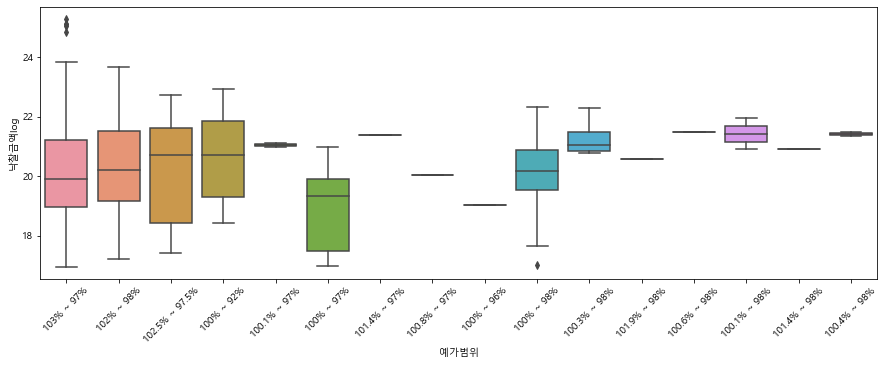

In [45]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=data, x='예가범위', y='낙찰금액log')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '103% ~ 97%'),
  Text(1, 0, '102% ~ 98%'),
  Text(2, 0, '102.5% ~ 97.5%'),
  Text(3, 0, '100% ~ 92%'),
  Text(4, 0, '100.1% ~ 97%'),
  Text(5, 0, '100% ~ 97%'),
  Text(6, 0, '101.4% ~ 97%'),
  Text(7, 0, '100.8% ~ 97%'),
  Text(8, 0, '100% ~ 96%'),
  Text(9, 0, '100% ~ 98%'),
  Text(10, 0, '100.3% ~ 98%'),
  Text(11, 0, '101.9% ~ 98%'),
  Text(12, 0, '100.6% ~ 98%'),
  Text(13, 0, '100.1% ~ 98%'),
  Text(14, 0, '101.4% ~ 98%'),
  Text(15, 0, '100.4% ~ 98%')])

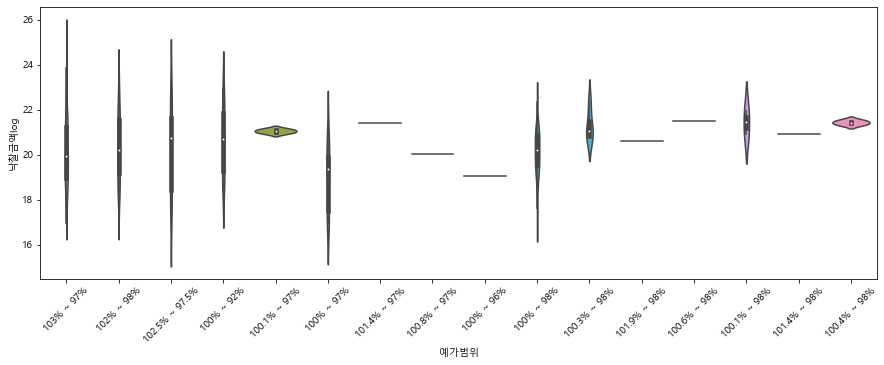

In [46]:
plt.figure(figsize=(15, 5))
sns.violinplot(data=data, x='예가범위', y='낙찰금액log')
plt.xticks(rotation=45)

<AxesSubplot:xlabel='연도', ylabel='낙찰금액log'>

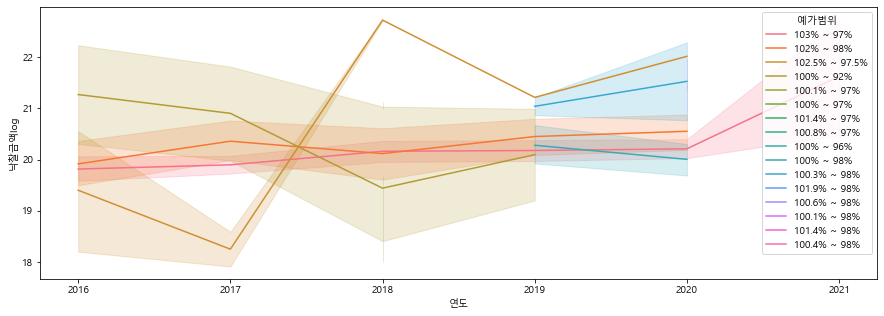

In [49]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=data, x='연도', y='낙찰금액log', hue='예가범위')

In [55]:
t = pd.pivot_table(data=df, index='연도', columns='예가범위', values='낙찰금액').round()
t

예가범위,100% ~ 92%,100% ~ 96%,100% ~ 97%,100% ~ 98%,100.1% ~ 97%,100.1% ~ 98%,100.3% ~ 98%,100.4% ~ 98%,100.6% ~ 98%,100.8% ~ 97%,101.4% ~ 97%,101.4% ~ 98%,101.9% ~ 98%,102% ~ 98%,102.5% ~ 97.5%,103% ~ 97%
연도,,,,,,,,,,,,,,,,
2016,2582809655.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1541149475.0000,544113872.0000,1181078087.0000
2017,2864231181.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1846136471.0000,89344500.0000,1630739005.0000
2018,539883113.0000,185636780.0000,350920794.0000,NaN,1383613510.0000,NaN,NaN,NaN,NaN,504338800.0000,1938557000.0000,NaN,NaN,2012588467.0000,7361940500.0000,1484224285.0000
2019,760468440.0000,NaN,NaN,795689903.0000,NaN,NaN,1390089950.0000,NaN,2130385000.0000,NaN,NaN,NaN,870853000.0000,1894064512.0000,1630402026.0000,1742011618.0000
2020,NaN,NaN,NaN,784745879.0000,NaN,2303133751.0000,2903518500.0000,2021293500.0000,NaN,NaN,NaN,1213303858.0000,NaN,2128357956.0000,3631098000.0000,2440900952.0000
2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5495634600.0000


<AxesSubplot:xlabel='연도', ylabel='예가범위'>

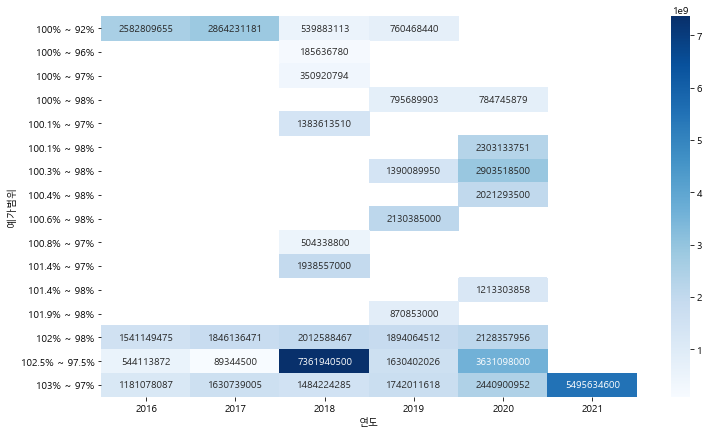

In [56]:
plt.figure(figsize=(12, 7))
sns.heatmap(t.T, cmap='Blues', annot=True, fmt='.0f')

In [57]:
data_corr = data.corr()
data_corr

,연도,월,일,기초금액log,추정가격log,예정가격log,낙찰금액log
연도,1.0000,0.0612,-0.0674,0.1044,0.1037,0.1047,0.1060
월,0.0612,1.0000,-0.0916,0.0275,0.0264,0.0276,0.0282
일,-0.0674,-0.0916,1.0000,-0.0073,-0.0115,-0.0073,-0.0078
기초금액log,0.1044,0.0275,-0.0073,1.0000,0.9550,1.0000,0.9999
추정가격log,0.1037,0.0264,-0.0115,0.9550,1.0000,0.9550,0.9550
예정가격log,0.1047,0.0276,-0.0073,1.0000,0.9550,1.0000,1.0000
낙찰금액log,0.1060,0.0282,-0.0078,0.9999,0.9550,1.0000,1.0000


<AxesSubplot:>

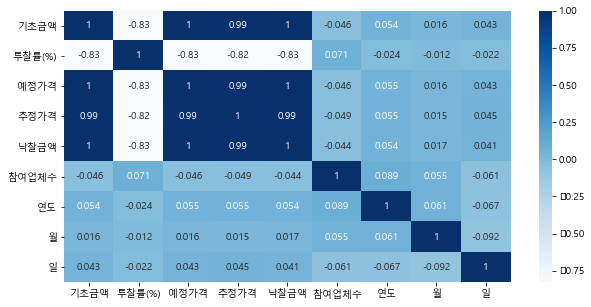

In [122]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

<AxesSubplot:>

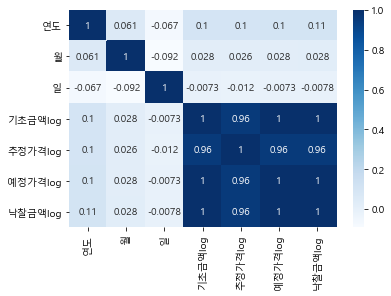

In [58]:
sns.heatmap(data.corr(), annot=True, cmap='Blues')

C:\Users\hyuk\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


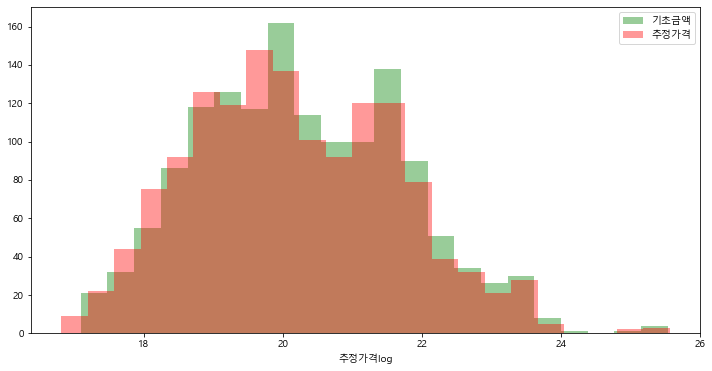

In [59]:
plt.figure(figsize=(12, 6))

ax = sns.distplot(data['기초금액log'], hist=True, norm_hist=False, kde=False, label='기초금액', color='green')
ax = sns.distplot(data['추정가격log'], hist=True, norm_hist=False, kde=False, label='추정가격', color='red')

plt.legend()
plt.show()

In [60]:
data

,연도,월,일,기초금액log,추정가격log,예정가격log,낙찰금액log,예가범위
0,2016,12,27,20.5342,20.4489,20.5293,20.3986,103% ~ 97%
1,2016,12,22,18.1992,18.1039,18.1913,18.0606,103% ~ 97%
2,2016,12,20,23.3043,23.2386,23.2963,23.0907,103% ~ 97%
3,2016,12,15,19.4943,19.3990,19.4842,19.3535,103% ~ 97%
4,2016,12,15,20.5575,20.4926,20.5586,20.4279,102% ~ 98%
...,...,...,...,...,...,...,...,...
1409,2021,1,12,20.1345,20.0392,20.1242,20.0023,103% ~ 97%
1410,2021,1,12,20.2680,20.1727,20.2684,20.1450,103% ~ 97%
1411,2021,1,8,22.4176,22.3223,22.4117,22.2784,103% ~ 97%
1412,2021,1,8,23.7978,23.7457,23.7968,23.6033,103% ~ 97%


In [61]:
estimated_range = data['예가범위'].copy()
estimated_range

0       103% ~ 97%
1       103% ~ 97%
2       103% ~ 97%
3       103% ~ 97%
4       102% ~ 98%
           ...    
1409    103% ~ 97%
1410    103% ~ 97%
1411    103% ~ 97%
1412    103% ~ 97%
1413    103% ~ 97%
Name: 예가범위, Length: 1414, dtype: object

In [62]:
def count_range1(rng):
    est_range1 = rng.split('~')[0]
    est_range1 = float(est_range1.split('%')[0])
    return est_range1

def count_range2(rng):
    est_range2 = rng.split('~')[1]
    est_range2 = float(est_range2.split('%')[0])
    return est_range2

In [63]:
r1 = estimated_range.apply(count_range1)

In [64]:
r2 = estimated_range.apply(count_range2)

In [65]:
data['new_예가범위'] = r1 - r2
data

,연도,월,일,기초금액log,추정가격log,예정가격log,낙찰금액log,예가범위,new_예가범위
0,2016,12,27,20.5342,20.4489,20.5293,20.3986,103% ~ 97%,6.0000
1,2016,12,22,18.1992,18.1039,18.1913,18.0606,103% ~ 97%,6.0000
2,2016,12,20,23.3043,23.2386,23.2963,23.0907,103% ~ 97%,6.0000
3,2016,12,15,19.4943,19.3990,19.4842,19.3535,103% ~ 97%,6.0000
4,2016,12,15,20.5575,20.4926,20.5586,20.4279,102% ~ 98%,4.0000
...,...,...,...,...,...,...,...,...,...
1409,2021,1,12,20.1345,20.0392,20.1242,20.0023,103% ~ 97%,6.0000
1410,2021,1,12,20.2680,20.1727,20.2684,20.1450,103% ~ 97%,6.0000
1411,2021,1,8,22.4176,22.3223,22.4117,22.2784,103% ~ 97%,6.0000
1412,2021,1,8,23.7978,23.7457,23.7968,23.6033,103% ~ 97%,6.0000


<AxesSubplot:xlabel='연도', ylabel='낙찰금액'>

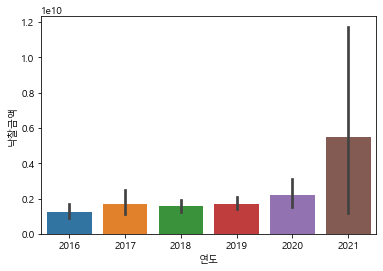

In [66]:
sns.barplot(data=df, x='연도', y='낙찰금액')

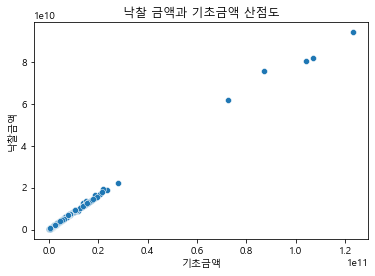

In [117]:
sns.scatterplot(x='기초금액', y='낙찰금액', data=df)
plt.title('낙찰 금액과 기초금액 산점도')
plt.show()

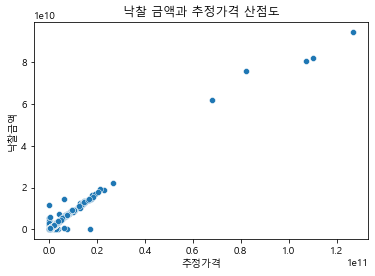

In [119]:
sns.scatterplot(x='추정가격', y='낙찰금액', data=df)
plt.title('낙찰 금액과 추정가격 산점도')
plt.show()

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [85]:
x_data = data[['기초금액log', '추정가격log', 'new_예가범위']]
y_data = data['낙찰금액log']

x_data = x_data.values
y_data = y_data.values
y_data = y_data.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

In [86]:
x_train.shape, x_test.shape

((989, 3), (425, 3))

In [87]:
linear_reg = LinearRegression(n_jobs=-1)
linear_reg.fit(x_train, y_train)
linear_pred = linear_reg.predict(x_test)

In [88]:
linear_pred.shape

(425, 1)

In [89]:
y_test.reshape(-1)

array([19.02896032, 19.14856842, 21.05826771, 21.42914724, 22.76959471,
       19.33671891, 18.06201811, 21.08863318, 21.09607482, 18.79467562,
       19.66885606, 21.57657307, 18.64209616, 19.67203129, 19.56535822,
       19.88905957, 21.64665349, 21.93238169, 18.65710373, 19.57848102,
       22.21389431, 19.94097701, 17.8181966 , 20.02233444, 19.1390131 ,
       19.85674543, 20.82697519, 19.27532925, 19.73301904, 18.99223527,
       22.95754883, 19.69478018, 21.64829587, 21.40263074, 20.12497601,
       18.95924215, 19.31230986, 19.57363853, 18.14933661, 18.99682209,
       21.22337727, 19.07824738, 21.40796483, 21.70072384, 25.04859685,
       21.44738672, 18.46279055, 20.09510713, 19.26540243, 19.20204025,
       22.89809696, 19.93256536, 20.96454553, 20.32468915, 18.82495848,
       18.89651414, 20.70277023, 17.16062586, 19.81190046, 19.18930538,
       23.24265307, 19.97564346, 18.89773254, 18.88443866, 21.53966772,
       19.89177571, 17.69619768, 23.40499128, 21.27616179, 22.73

In [90]:
res = pd.DataFrame({'prediction': linear_pred.reshape(-1), 'actual': y_test.reshape(-1)})
res

,prediction,actual
0,19.0264,19.0290
1,19.1399,19.1486
2,21.0649,21.0583
3,21.4261,21.4291
4,22.7669,22.7696
...,...,...
420,19.8561,19.8643
421,19.9424,19.9470
422,19.1984,19.1948
423,20.9063,20.9054


In [91]:
res['diff'] = abs(res['prediction'] - res['actual'])
res

,prediction,actual,diff
0,19.0264,19.0290,0.0025
1,19.1399,19.1486,0.0087
2,21.0649,21.0583,0.0066
3,21.4261,21.4291,0.0031
4,22.7669,22.7696,0.0027
...,...,...,...
420,19.8561,19.8643,0.0082
421,19.9424,19.9470,0.0046
422,19.1984,19.1948,0.0036
423,20.9063,20.9054,0.0009


In [123]:
res['diff'].mean()

0.010342004955987283

C:\Users\hyuk\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hyuk\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


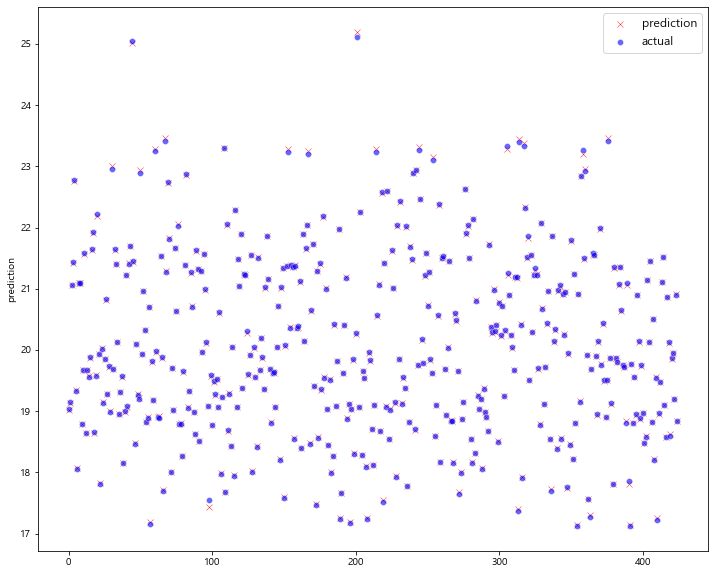

In [92]:
plt.figure(figsize=(12, 10))

sns.scatterplot(res.index, res['prediction'], alpha=0.9, marker='x', color='r')
sns.scatterplot(res.index, res['actual'], alpha=0.6, marker='o', color='blue')

plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()

In [93]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, SimpleRNN
from keras.layers import Bidirectional
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [96]:
train_feature = data[['기초금액log', '추정가격log', 'new_예가범위']]
train_label = data['낙찰금액log']

In [97]:
minmaxScaler = MinMaxScaler(feature_range=(0, 1))
standardScaler = StandardScaler()

In [98]:
train_feature = minmaxScaler.fit_transform(train_feature)
train_label = train_label.values
train_label = train_label.reshape(-1, 1)
train_label = standardScaler.fit_transform(train_label)

In [99]:
train_feature.shape

(1414, 3)

In [100]:
train_label.shape

(1414, 1)

In [101]:
x_train, x_test, y_train, y_test = train_test_split(train_feature, train_label, test_size=0.3, random_state=2021)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=2021)

In [102]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## RNN

In [103]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [104]:
model1 = Sequential()
model1.add(SimpleRNN(8, input_shape=(x_train.shape[1], x_train.shape[2])))
model1.add(Dense(1))

In [105]:
model1.compile(loss='mse', optimizer='adam')
hist = model1.fit(x_train, y_train, epochs=500, shuffle=False, callbacks=[es], validation_data=(x_val, y_val))

Epoch 1/500
31/31 [==============================] - 2s 9ms/step - loss: 0.8961 - val_loss: 0.9974
Epoch 2/500
31/31 [==============================] - 0s 2ms/step - loss: 0.7428 - val_loss: 0.8720
Epoch 3/500
31/31 [==============================] - 0s 2ms/step - loss: 0.6217 - val_loss: 0.7118
Epoch 4/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4768 - val_loss: 0.5197
Epoch 5/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3132 - val_loss: 0.3169
Epoch 6/500
31/31 [==============================] - 0s 2ms/step - loss: 0.1631 - val_loss: 0.1550
Epoch 7/500
31/31 [==============================] - 0s 2ms/step - loss: 0.0674 - val_loss: 0.0701
Epoch 8/500
31/31 [==============================] - 0s 2ms/step - loss: 0.0301 - val_loss: 0.0418
Epoch 9/500
31/31 [==============================] - 0s 2ms/step - loss: 0.0213 - val_loss: 0.0341
Epoch 10/500
31/31 [==============================] - 0s 2ms/step - loss: 0.0190 - val_loss: 0.0311
Epoch 11/

31/31 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0052
Epoch 84/500
31/31 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.0051
Epoch 85/500
31/31 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.0050
Epoch 86/500
31/31 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0049
Epoch 87/500
31/31 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0048
Epoch 88/500
31/31 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0047
Epoch 89/500
31/31 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0046
Epoch 90/500
31/31 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0045
Epoch 91/500
31/31 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0045
Epoch 92/500
31/31 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0044
Epoch 93/500


31/31 [==============================] - 0s 1ms/step - loss: 3.8788e-04 - val_loss: 8.9370e-04
Epoch 163/500
31/31 [==============================] - 0s 1ms/step - loss: 3.8118e-04 - val_loss: 8.7591e-04
Epoch 164/500
31/31 [==============================] - 0s 1ms/step - loss: 3.7469e-04 - val_loss: 8.5870e-04
Epoch 165/500
31/31 [==============================] - 0s 1ms/step - loss: 3.6840e-04 - val_loss: 8.4203e-04
Epoch 166/500
31/31 [==============================] - 0s 2ms/step - loss: 3.6233e-04 - val_loss: 8.2588e-04
Epoch 167/500
31/31 [==============================] - 0s 2ms/step - loss: 3.5648e-04 - val_loss: 8.1024e-04
Epoch 168/500
31/31 [==============================] - 0s 2ms/step - loss: 3.5086e-04 - val_loss: 7.9507e-04
Epoch 169/500
31/31 [==============================] - 0s 2ms/step - loss: 3.4548e-04 - val_loss: 7.8038e-04
Epoch 170/500
31/31 [==============================] - 0s 1ms/step - loss: 3.4033e-04 - val_loss: 7.6615e-04
Epoch 171/500
31/31 [============

31/31 [==============================] - 0s 1ms/step - loss: 2.2797e-04 - val_loss: 3.6637e-04
Epoch 238/500
31/31 [==============================] - 0s 2ms/step - loss: 2.2722e-04 - val_loss: 3.6407e-04
Epoch 239/500
31/31 [==============================] - 0s 2ms/step - loss: 2.2648e-04 - val_loss: 3.6182e-04
Epoch 240/500
31/31 [==============================] - 0s 2ms/step - loss: 2.2575e-04 - val_loss: 3.5963e-04
Epoch 241/500
31/31 [==============================] - 0s 2ms/step - loss: 2.2502e-04 - val_loss: 3.5748e-04
Epoch 242/500
31/31 [==============================] - 0s 2ms/step - loss: 2.2430e-04 - val_loss: 3.5537e-04
Epoch 243/500
31/31 [==============================] - 0s 2ms/step - loss: 2.2359e-04 - val_loss: 3.5332e-04
Epoch 244/500
31/31 [==============================] - 0s 2ms/step - loss: 2.2288e-04 - val_loss: 3.5130e-04
Epoch 245/500
31/31 [==============================] - 0s 2ms/step - loss: 2.2217e-04 - val_loss: 3.4933e-04
Epoch 246/500
31/31 [============

31/31 [==============================] - 0s 2ms/step - loss: 1.8781e-04 - val_loss: 2.6909e-04
Epoch 313/500
31/31 [==============================] - 0s 1ms/step - loss: 1.8746e-04 - val_loss: 2.6837e-04
Epoch 314/500
31/31 [==============================] - 0s 1ms/step - loss: 1.8712e-04 - val_loss: 2.6767e-04
Epoch 315/500
31/31 [==============================] - 0s 2ms/step - loss: 1.8678e-04 - val_loss: 2.6697e-04
Epoch 316/500
31/31 [==============================] - 0s 2ms/step - loss: 1.8645e-04 - val_loss: 2.6629e-04
Epoch 317/500
31/31 [==============================] - 0s 2ms/step - loss: 1.8612e-04 - val_loss: 2.6561e-04
Epoch 318/500
31/31 [==============================] - 0s 1ms/step - loss: 1.8579e-04 - val_loss: 2.6494e-04
Epoch 319/500
31/31 [==============================] - 0s 2ms/step - loss: 1.8547e-04 - val_loss: 2.6427e-04
Epoch 320/500
31/31 [==============================] - 0s 1ms/step - loss: 1.8515e-04 - val_loss: 2.6362e-04
Epoch 321/500
31/31 [============

31/31 [==============================] - 0s 1ms/step - loss: 1.6921e-04 - val_loss: 2.3280e-04
Epoch 388/500
31/31 [==============================] - 0s 1ms/step - loss: 1.6904e-04 - val_loss: 2.3248e-04
Epoch 389/500
31/31 [==============================] - 0s 1ms/step - loss: 1.6886e-04 - val_loss: 2.3216e-04
Epoch 390/500
31/31 [==============================] - 0s 2ms/step - loss: 1.6868e-04 - val_loss: 2.3184e-04
Epoch 391/500
31/31 [==============================] - 0s 1ms/step - loss: 1.6851e-04 - val_loss: 2.3152e-04
Epoch 392/500
31/31 [==============================] - 0s 1ms/step - loss: 1.6834e-04 - val_loss: 2.3121e-04
Epoch 393/500
31/31 [==============================] - 0s 1ms/step - loss: 1.6816e-04 - val_loss: 2.3090e-04
Epoch 394/500
31/31 [==============================] - 0s 1ms/step - loss: 1.6800e-04 - val_loss: 2.3059e-04
Epoch 395/500
31/31 [==============================] - 0s 1ms/step - loss: 1.6782e-04 - val_loss: 2.3028e-04
Epoch 396/500
31/31 [============

31/31 [==============================] - 0s 1ms/step - loss: 1.5852e-04 - val_loss: 2.1440e-04
Epoch 463/500
31/31 [==============================] - 0s 2ms/step - loss: 1.5841e-04 - val_loss: 2.1422e-04
Epoch 464/500
31/31 [==============================] - 0s 1ms/step - loss: 1.5829e-04 - val_loss: 2.1403e-04
Epoch 465/500
31/31 [==============================] - 0s 1ms/step - loss: 1.5818e-04 - val_loss: 2.1385e-04
Epoch 466/500
31/31 [==============================] - 0s 1ms/step - loss: 1.5806e-04 - val_loss: 2.1367e-04
Epoch 467/500
31/31 [==============================] - 0s 1ms/step - loss: 1.5795e-04 - val_loss: 2.1349e-04
Epoch 468/500
31/31 [==============================] - 0s 1ms/step - loss: 1.5784e-04 - val_loss: 2.1331e-04
Epoch 469/500
31/31 [==============================] - 0s 2ms/step - loss: 1.5773e-04 - val_loss: 2.1313e-04
Epoch 470/500
31/31 [==============================] - 0s 1ms/step - loss: 1.5762e-04 - val_loss: 2.1296e-04
Epoch 471/500
31/31 [============

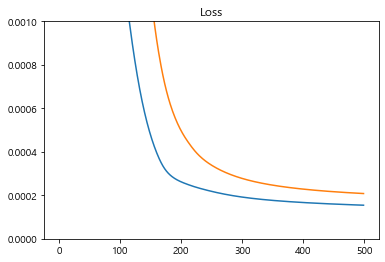

In [106]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0, 0.001)
plt.title('Loss')
plt.show()

In [107]:
train_score = model1.evaluate(x_train, y_train, batch_size=1, verbose=0)
print('Train score : ', train_score)

test_score = model1.evaluate(x_test, y_test, batch_size=1, verbose=0)
print('Test score : ', test_score)

Train score :  0.00017138296971097589
Test score :  0.00020165489695500582


## LSTM

In [108]:
class CustomHistory(keras.callbacks.Callback):
    def __init__(self):
        self.train_loss = []
        self.val_loss = []
    
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))

In [109]:
from time import strftime
import time

history = CustomHistory()

def fit_lstm(x_train, y_train, x_val, batch_size, nb_epoch, neurons):
    start_time = time.time()
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=False))
    model.add(Dense(1))
    print(model.summary())
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=nb_epoch, batch_size=batch_size, verbose=1, shuffle=False, callbacks=[history, es],
             validation_data=(x_val,y_val))
    print('\n걸린 시간(second) : ', time.time() - start_time)
    return model

In [110]:
num_epochs = 500
model2 = fit_lstm(x_train, y_train, x_val, 16, num_epochs, 8)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8)                 320       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
62/62 [==============================] - 2s 8ms/step - loss: 0.9547 - val_loss: 1.2009
Epoch 2/500
62/62 [==============================] - 0s 3ms/step - loss: 0.9255 - val_loss: 1.1586
Epoch 3/500
62/62 [==============================] - 0s 2ms/step - loss: 0.8845 - val_loss: 1.0781
Epoch 4/500
62/62 [==============================] - 0s 2ms/step - loss: 0.7923 - val_loss: 0.8915
Epoch 5/500
62/62 [==============================] - 0s 2ms/step - loss: 0.5813 - val_loss: 0.5213
Epoch 6/500
62/62 

Epoch 77/500
62/62 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0038
Epoch 78/500
62/62 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0037
Epoch 79/500
62/62 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0036
Epoch 80/500
62/62 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0036
Epoch 81/500
62/62 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0035
Epoch 82/500
62/62 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0034
Epoch 83/500
62/62 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0033
Epoch 84/500
62/62 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0033
Epoch 85/500
62/62 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0032
Epoch 86/500
62/62 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0031


Epoch 157/500
62/62 [==============================] - 0s 2ms/step - loss: 6.5776e-04 - val_loss: 9.3348e-04
Epoch 158/500
62/62 [==============================] - 0s 2ms/step - loss: 6.4604e-04 - val_loss: 9.2688e-04
Epoch 159/500
62/62 [==============================] - 0s 2ms/step - loss: 6.3471e-04 - val_loss: 9.1849e-04
Epoch 160/500
62/62 [==============================] - 0s 2ms/step - loss: 6.2390e-04 - val_loss: 9.0834e-04
Epoch 161/500
62/62 [==============================] - 0s 2ms/step - loss: 6.1370e-04 - val_loss: 8.9661e-04
Epoch 162/500
62/62 [==============================] - 0s 2ms/step - loss: 6.0417e-04 - val_loss: 8.8363e-04
Epoch 163/500
62/62 [==============================] - 0s 2ms/step - loss: 5.9529e-04 - val_loss: 8.6980e-04
Epoch 164/500
62/62 [==============================] - 0s 2ms/step - loss: 5.8705e-04 - val_loss: 8.5552e-04
Epoch 165/500
62/62 [==============================] - 0s 2ms/step - loss: 5.7937e-04 - val_loss: 8.4119e-04
Epoch 166/500
62/62

62/62 [==============================] - 0s 2ms/step - loss: 3.4646e-04 - val_loss: 5.0090e-04
Epoch 233/500
62/62 [==============================] - 0s 2ms/step - loss: 3.4383e-04 - val_loss: 4.9704e-04
Epoch 234/500
62/62 [==============================] - 0s 2ms/step - loss: 3.4121e-04 - val_loss: 4.9305e-04
Epoch 235/500
62/62 [==============================] - 0s 2ms/step - loss: 3.3860e-04 - val_loss: 4.8894e-04
Epoch 236/500
62/62 [==============================] - 0s 2ms/step - loss: 3.3600e-04 - val_loss: 4.8471e-04
Epoch 237/500
62/62 [==============================] - 0s 2ms/step - loss: 3.3344e-04 - val_loss: 4.8039e-04
Epoch 238/500
62/62 [==============================] - 0s 2ms/step - loss: 3.3090e-04 - val_loss: 4.7598e-04
Epoch 239/500
62/62 [==============================] - 0s 2ms/step - loss: 3.2840e-04 - val_loss: 4.7150e-04
Epoch 240/500
62/62 [==============================] - 0s 2ms/step - loss: 3.2594e-04 - val_loss: 4.6696e-04
Epoch 241/500
62/62 [============

62/62 [==============================] - 0s 2ms/step - loss: 2.2904e-04 - val_loss: 2.5074e-04
Epoch 308/500
62/62 [==============================] - 0s 2ms/step - loss: 2.2811e-04 - val_loss: 2.4890e-04
Epoch 309/500
62/62 [==============================] - 0s 2ms/step - loss: 2.2719e-04 - val_loss: 2.4709e-04
Epoch 310/500
62/62 [==============================] - 0s 2ms/step - loss: 2.2628e-04 - val_loss: 2.4530e-04
Epoch 311/500
62/62 [==============================] - 0s 2ms/step - loss: 2.2539e-04 - val_loss: 2.4355e-04
Epoch 312/500
62/62 [==============================] - 0s 2ms/step - loss: 2.2451e-04 - val_loss: 2.4183e-04
Epoch 313/500
62/62 [==============================] - 0s 2ms/step - loss: 2.2364e-04 - val_loss: 2.4014e-04
Epoch 314/500
62/62 [==============================] - 0s 2ms/step - loss: 2.2278e-04 - val_loss: 2.3847e-04
Epoch 315/500
62/62 [==============================] - 0s 2ms/step - loss: 2.2193e-04 - val_loss: 2.3684e-04
Epoch 316/500
62/62 [============

62/62 [==============================] - 0s 2ms/step - loss: 1.8578e-04 - val_loss: 1.7456e-04
Epoch 383/500
62/62 [==============================] - 0s 2ms/step - loss: 1.8547e-04 - val_loss: 1.7410e-04
Epoch 384/500
62/62 [==============================] - 0s 2ms/step - loss: 1.8516e-04 - val_loss: 1.7366e-04
Epoch 385/500
62/62 [==============================] - 0s 2ms/step - loss: 1.8485e-04 - val_loss: 1.7322e-04
Epoch 386/500
62/62 [==============================] - 0s 2ms/step - loss: 1.8455e-04 - val_loss: 1.7279e-04
Epoch 387/500
62/62 [==============================] - 0s 2ms/step - loss: 1.8425e-04 - val_loss: 1.7237e-04
Epoch 388/500
62/62 [==============================] - 0s 2ms/step - loss: 1.8395e-04 - val_loss: 1.7196e-04
Epoch 389/500
62/62 [==============================] - 0s 2ms/step - loss: 1.8366e-04 - val_loss: 1.7156e-04
Epoch 390/500
62/62 [==============================] - 0s 3ms/step - loss: 1.8337e-04 - val_loss: 1.7116e-04
Epoch 391/500
62/62 [============

62/62 [==============================] - 0s 3ms/step - loss: 1.7043e-04 - val_loss: 1.5608e-04
Epoch 458/500
62/62 [==============================] - 0s 3ms/step - loss: 1.7030e-04 - val_loss: 1.5596e-04
Epoch 459/500
62/62 [==============================] - 0s 3ms/step - loss: 1.7017e-04 - val_loss: 1.5585e-04
Epoch 460/500
62/62 [==============================] - 0s 3ms/step - loss: 1.7004e-04 - val_loss: 1.5574e-04
Epoch 461/500
62/62 [==============================] - 0s 3ms/step - loss: 1.6992e-04 - val_loss: 1.5563e-04
Epoch 462/500
62/62 [==============================] - 0s 3ms/step - loss: 1.6980e-04 - val_loss: 1.5553e-04
Epoch 463/500
62/62 [==============================] - 0s 4ms/step - loss: 1.6967e-04 - val_loss: 1.5543e-04
Epoch 464/500
62/62 [==============================] - 0s 3ms/step - loss: 1.6955e-04 - val_loss: 1.5532e-04
Epoch 465/500
62/62 [==============================] - 0s 3ms/step - loss: 1.6943e-04 - val_loss: 1.5522e-04
Epoch 466/500
62/62 [============

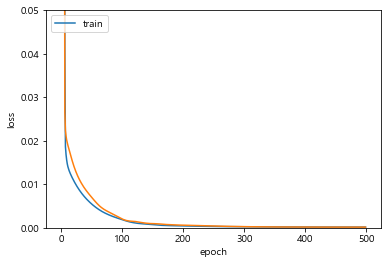

In [111]:
plt.plot(history.train_loss)
plt.plot(history.val_loss)

plt.ylim(0.0, 0.05)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [112]:
train_score = model2.evaluate(x_train, y_train, batch_size=1, verbose=0)
print('Train score: ', train_score)

test_score = model2.evaluate(x_test, y_test, batch_size=1, verbose=0)
print('Test score : ', test_score)

Train score:  0.0001350735838059336
Test score :  0.000153294691699557


In [113]:
model2_pred = model2.predict(x_test, batch_size=1)

C:\Users\hyuk\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hyuk\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


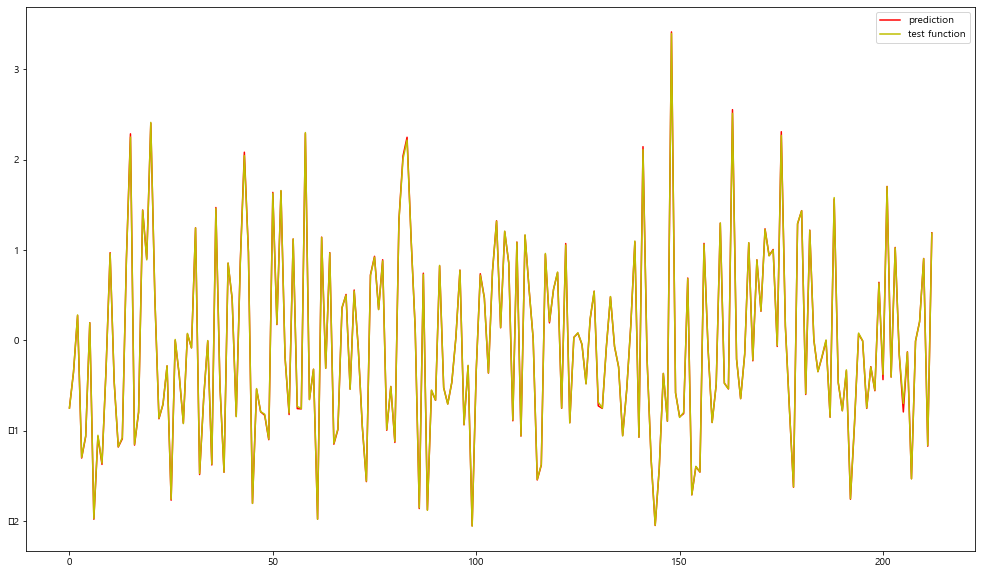

In [114]:
plt.figure(figsize=(17, 10))
plt.plot(model2_pred, 'r', label="prediction")
plt.plot(y_test, 'y', label='test function')
plt.legend()
plt.show()